In [4]:
%matplotlib inline

import uproot
import glob
import pprint
import matplotlib.pyplot as plt


pp = pprint.PrettyPrinter()
files = glob.glob("/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4" + "/**/*.root", recursive=True)
files = [file + ':taus' for file in files]
pp.pprint(files)

testfile = '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_jets.root:taus'
ttree = uproot.open(testfile)

test = ttree.keys(filter_name="/pfCand_/")
print(test)
print("")

pp.pprint(f'keys: {ttree.keys()}')
print("")

pp.pprint(f'values: {ttree.values()}')
print("")

pp.pprint(ttree.show())
pfCand_pt = ttree['pfCand_pt'].array()
nNodes = [len(x) for x in pfCand_pt]
nEdges = [x*(x-1) for x in nNodes]
# run = ttree['run'].array()
lumi = ttree['lumi'].array()
# evt = ttree['evt'].array()
# pfCand_eta = ttree['pfCand_eta'].array()
# pfCand_phi = ttree['pfCand_phi'].array()



['/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/WJetsToLNu_invalid.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/WJetsToLNu_taus.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_invalid.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/WJetsToLNu_muons.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_electrons.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_taus.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_muons.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/WJetsToLNu_electrons.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/DYJetsToLL_M-50_jets.root:taus',
 '/ceph/akhmet/forAndrewIsaac/prod_2018_v2_processed_v4/WJetsToLNu_jets.root:taus']
['pfCand_pt', 'pfCand_eta', 'pfCand_phi', 'pfCand_mass', 'pfCand_charge', 'pfCand_tauIso', 'pfCand_tauSignal', 'pfCan

In [5]:
a = 0
b = 5

print(f'lumi: {lumi[a:b]}')
print(f'pfCand_pt: {pfCand_pt[a:b]}')

print(f'graph count: {len(pfCand_pt)}')

print(f'Max node count: {max(nNodes)}')
print(f'Min node count: {min(nNodes)}')

print(f'Max edge count: {max(nEdges)}')
print(f'Min edge count: {min(nEdges)}')

lumi: [98286, 98286, 98286, 98286, 98286]
pfCand_pt: [[0.721, 0.924, 0.851, 0.614, 0.877, 0.573, ... 0.458, 0.199, 1.08, 0.414, 0.288]]
graph count: 1328780
Max node count: 350
Min node count: 9
Max edge count: 122150
Min edge count: 72


In [ ]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,7))
plt.hist(nNodes, bins=20)
plt.xlabel("node count")
plt.ylabel("frequency")
plt.savefig("NodeCount.png")
plt.show()

plt.figure(figsize=(10,7))
plt.hist(nEdges, bins=20, range=(0,60000))
plt.xlabel("edge count")
plt.ylabel("frequency")
plt.savefig("EdgeCount.png")
plt.show()

In [ ]:
pfCand_puppiWeightNoLep = ttree['pfCand_puppiWeightNoLep'].array()

In [ ]:
import awkward as ak

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_pt, axis=None), bins=100, range=(0, 50))
plt.xlabel("pfCand_pt")
plt.ylabel("frequency")
plt.savefig("pfCand_pt_noCut.png")
plt.show()

In [ ]:
print(pfCand_puppiWeightNoLep[0:5])
for puppiWeights in pfCand_puppiWeightNoLep[0:5]:
    for p in puppiWeights

print("\n\n")
for pt in pfCand_pt[0:5]:
    print(len(pt))

In [3]:
pfCand_phi = ttree['pfCand_phi'].array()

for phi in pfCand_phi[0:5]:
    print(phi)

[2.74, -3.01, 2.95, -3.07, 2.93, -2.68, ... -3.13, 2.97, 3.04, 2.8, -2.57, 2.78]
[2.18, 1.28, 1.63, 1.34, 1.14, 1.59, 1.26, ... 2.4, 1.51, 1.44, 1.25, 1.87, 1.67]
[-0.276, -0.676, 0.107, -0.585, -0.439, ... -0.639, -1.19, -0.934, -0.882, -0.843]
[0.78, -0.199, 0.231, 0.54, 0.049, 0.697, ... 0.96, 0.394, 1.04, 0.36, 0.515, 0.36]
[-3.06, 1.85, -3.01, 2.69, -3.07, 2.53, 2.72, ... 2.56, 2.82, 2.77, 2.14, 3.08, 2.21]


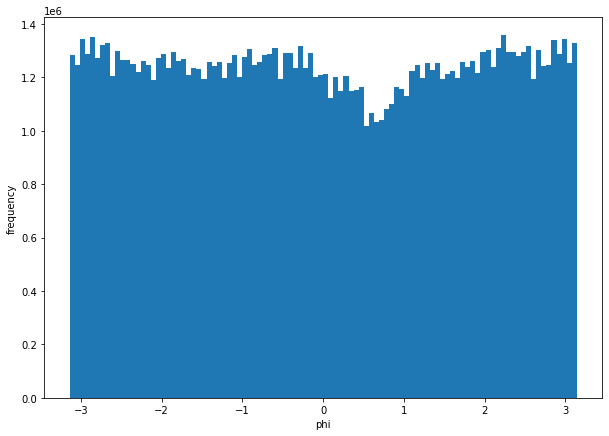

In [4]:
import awkward as ak

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_phi, axis=None), bins=100)
plt.xlabel("phi")
plt.ylabel("frequency")
plt.savefig("phi.png")
plt.show()

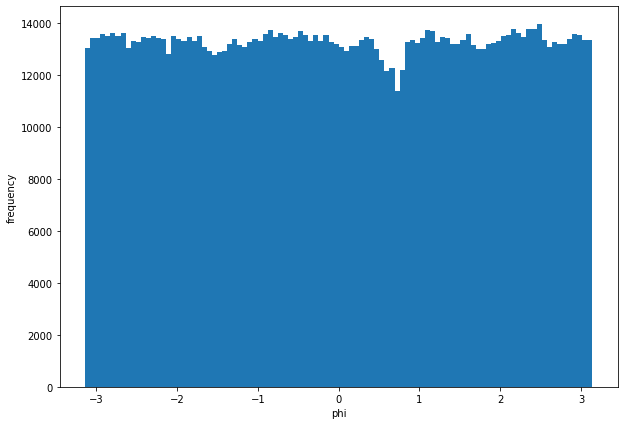

In [5]:
tau_phi = ttree['tau_phi'].array()

plt.figure(figsize=(10,7))
plt.hist(tau_phi, bins=100)
plt.xlabel("phi")
plt.ylabel("frequency")
plt.savefig("phi.png")
plt.show()

In [ ]:
pfCand_pt_cut = []

import time
start = time.time()

for i in range(len(pfCand_puppiWeightNoLep)):
    pfCand_pt_cut.append([])
    for j in range(len(pfCand_puppiWeightNoLep[i])):
        if(pfCand_puppiWeightNoLep[i][j] > 0):
            pfCand_pt_cut[i].append(pfCand_pt[j])
            
end = time.time()
elapsed = end - start
print(f'elapsed time. {elapsed} seconds')
        
nNodes_cut = [len(x) for x in pfCand_pt_cut]
nEdges_cut = [x*(x-1) for x in nNodes_cut]

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(nNodes_cut, bins=20)
plt.xlabel("node count")
plt.ylabel("frequency")
plt.savefig("NodeCount_cut.png")
plt.show()

plt.figure(figsize=(10,7))
plt.hist(nEdges_cut, bins=20, range=(0,60000))
plt.xlabel("edge count")
plt.ylabel("frequency")
plt.savefig("EdgeCount_cut.png")
plt.show()